In [60]:
import cv2
image = cv2.imread('Panto.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


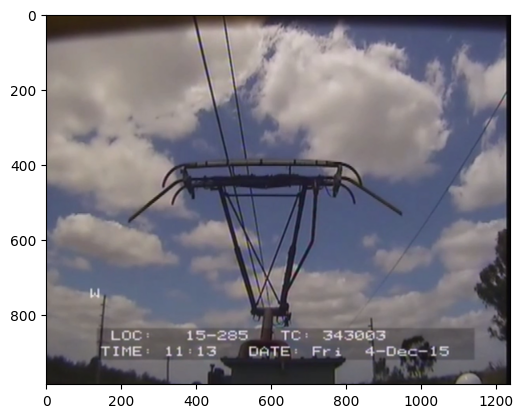

In [61]:
import matplotlib.pyplot as plt
plt.imshow(image_rgb)


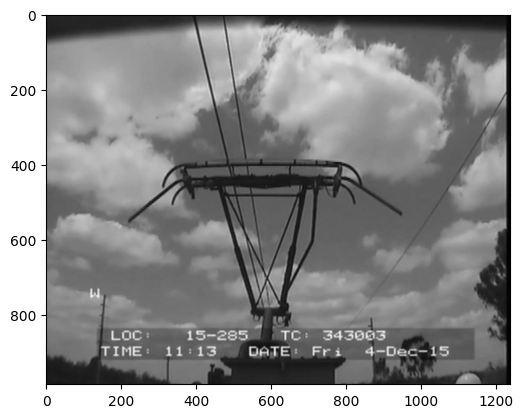

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## Gray -> Gaussian Blur

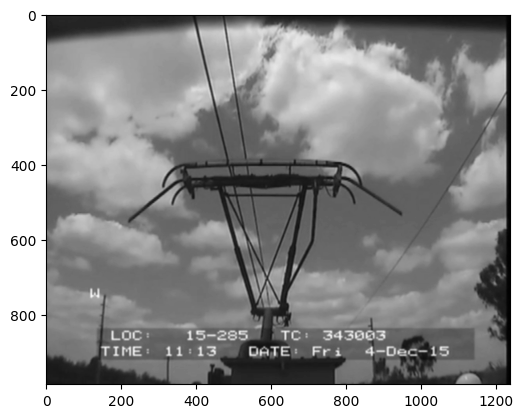

In [32]:
gaussian_blur_image = cv2.GaussianBlur(gray_image, (3, 3), 3)
plt.imshow(gaussian_blur_image, cmap='gray')

## Trying a column as a signal

In [20]:
gray_image.shape

(986, 1237)

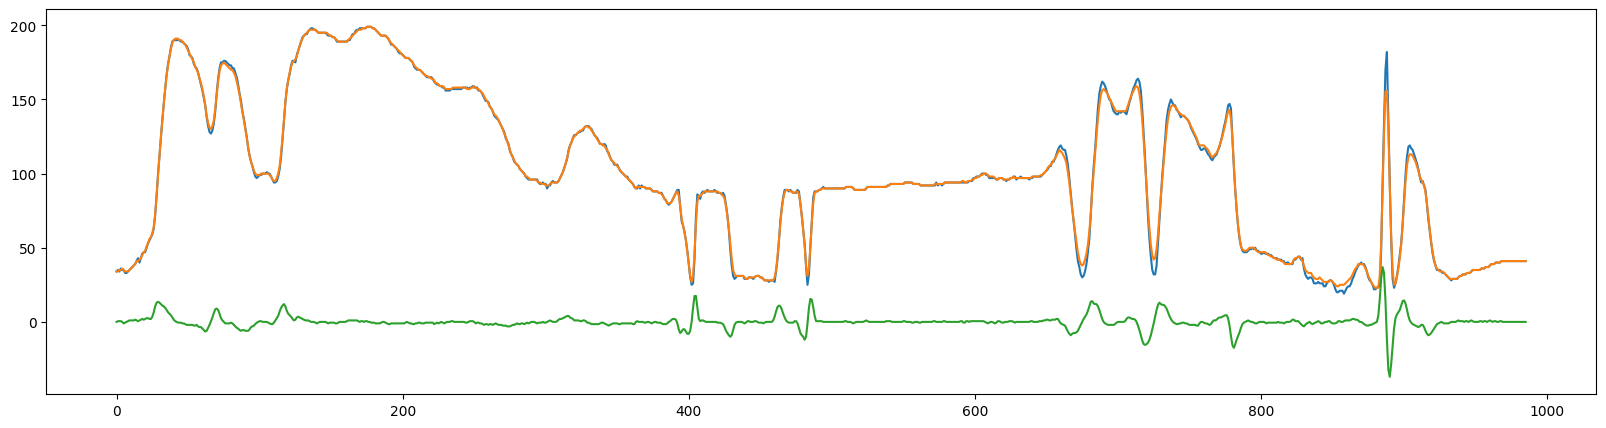

In [34]:
plt.figure(figsize=(20,5))
s = gray_image[:,600]
b = gaussian_blur_image[:,600]
plt.plot(s)
plt.plot(b)
e = np.gradient(b)
plt.plot(e)

# Blur -> Edge(Canny)

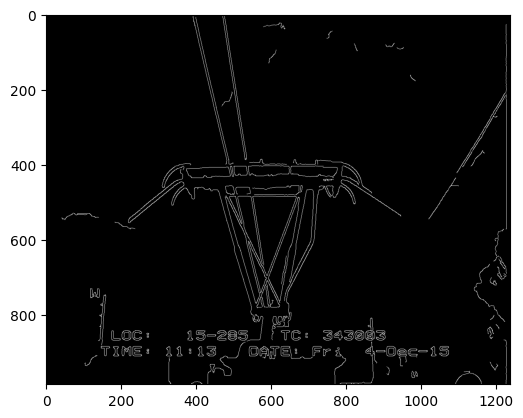

In [38]:
edges = cv2.Canny(gaussian_blur_image, 30, 150)
#edges = cv2.Canny(gaussian_blur_image, 200, 250)
plt.imshow(edges, cmap='gray')

# Edges -> HoughTranform (All lines)

In [46]:
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=80, minLineLength=150, maxLineGap=30)

#cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [ ]:
frame = image_rgb.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    # filter lines
    theta = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
    print(theta)
    if 0 <= theta <= 10: 
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) 


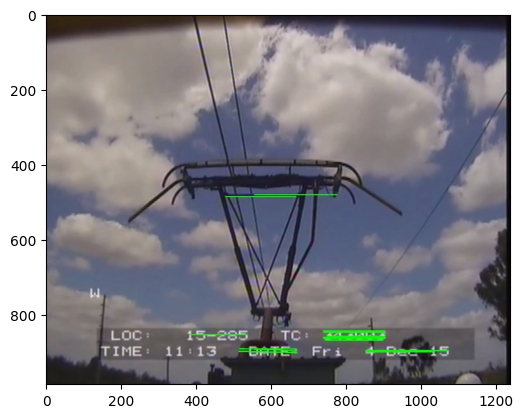

In [63]:
plt.imshow(frame)

In [ ]:
def calculate_intersection(line1, line2):
    # Unpack line coordinates
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2

    # Calculate slopes (m1, m2) and y-intercepts (c1, c2) of the lines
    m1 = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')  # Avoid division by zero
    c1 = y1 - m1 * x1

    m2 = (y4 - y3) / (x4 - x3) if x4 != x3 else float('inf')
    c2 = y3 - m2 * x3

    # Check if lines are parallel (slopes are equal)
    if m1 == m2:
        return None  # No intersection (parallel lines)

    # Calculate intersection point
    x_intersect = (c2 - c1) / (m1 - m2)
    y_intersect = m1 * x_intersect + c1

    return (x_intersect, y_intersect)